In [ ]:
!pip install statsmodels==0.12.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 26.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# Autoregressive Model

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = (10, 7.5)

# Simulate AR(2) Process


$ y_t = 0.33y_{t-1} + 0.5y_{t-2} $

In [ ]:
ar2 = np.array([1, 0.33, 0.5])
ma2 = np.array([1, 0, 0])

In [ ]:
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

In [ ]:
AR2_process

array([ 1.37359458e+00,  4.82220723e-02, -2.54450622e-02,  5.12879931e-01,
       -1.62645276e+00,  1.23086747e+00, -7.51534832e-01,  2.82120194e-01,
       -2.40282221e-01,  4.41321303e-01,  1.43287857e+00,  7.01216923e-01,
       -6.44525087e-01, -1.37347793e+00,  1.38989532e+00,  2.44338625e-01,
        3.05637174e-02,  3.37191200e-01, -1.08609539e+00,  2.43600971e+00,
       -1.51431086e+00, -1.69024028e+00,  3.08194770e-01,  9.28619913e-01,
       -1.99171334e+00,  3.17172886e-01,  1.16281910e+00, -2.16220070e-01,
        1.95153969e+00, -4.55905609e-01, -3.00829870e-01,  4.51642038e-01,
       -1.93183114e+00, -3.52053627e-02,  1.44605700e+00, -1.70822092e+00,
        5.19902209e-01,  9.42597739e-01,  4.29131794e-01,  9.78683919e-01,
        2.46794940e-01, -5.23399584e-01,  1.34056647e-01,  1.08174303e+00,
       -1.08964826e+00,  1.21221677e+00, -8.11329698e-01,  5.17298231e-01,
        3.67693204e-01, -3.45569664e-01, -7.17594709e-01,  5.63783154e-02,
       -1.82333990e-02,  

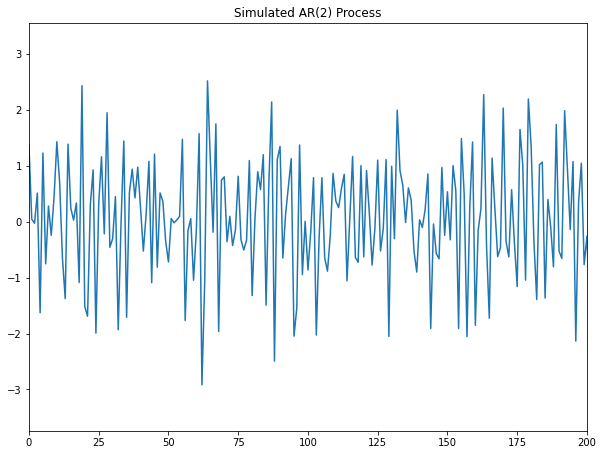

In [ ]:
plt.plot(AR2_process)
plt.title('Simulated AR(2) Process')
plt.xlim(0, 200)
plt.show()

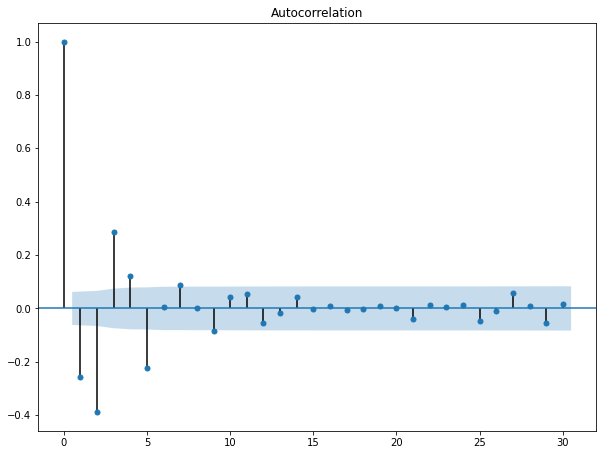

In [ ]:
plot_acf(AR2_process);


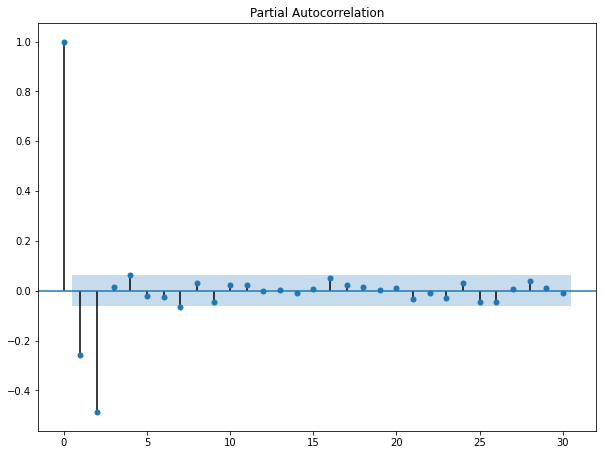

In [ ]:
plot_pacf(AR2_process);

In [ ]:
rho, sigma = yule_walker(AR2_process, 2, method='mle')
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [0.38003524 0.4863926 ]
sigma: 0.9588042034446616


# Simulate AR(3) Process

$ y_t = 0.33y_{t-1} + 0.5y_{t-2} + 0.07y_{t-3} $

In [ ]:
ar3 = np.array([1, 0.33, 0.5, 0.07])
ma3 = np.array([1, 0, 0, 0])

In [ ]:
AR3_process = ArmaProcess(ar3, ma3).generate_sample(nsample=10000)

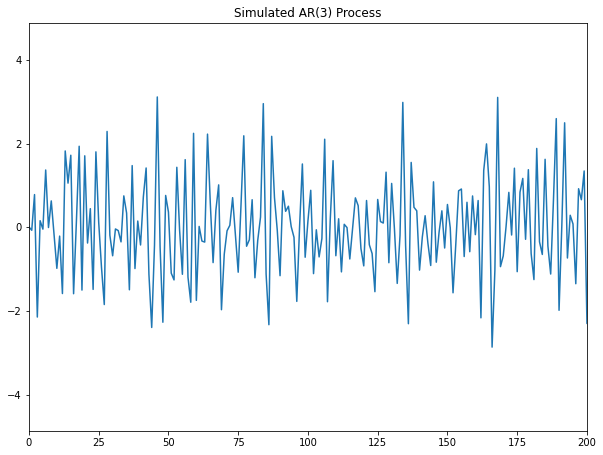

In [ ]:
plt.plot(AR3_process)
plt.title('Simulated AR(3) Process')
plt.xlim(0, 200)
plt.show()

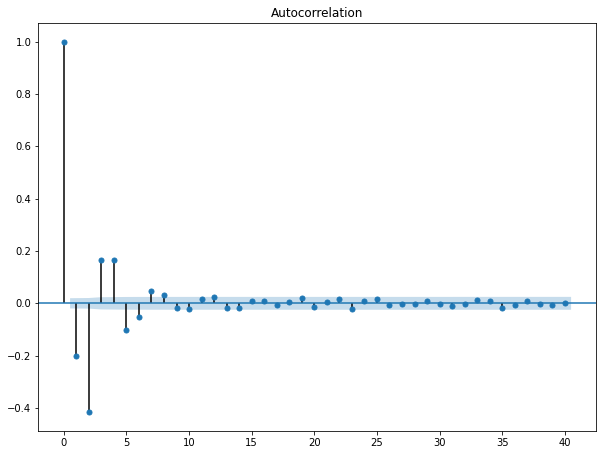

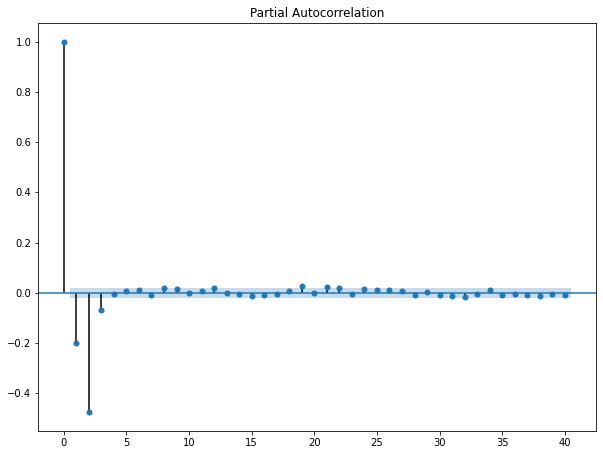

In [ ]:
plot_acf(AR3_process);
plot_pacf(AR3_process);

In [ ]:
rho, sigma = yule_walker(AR3_process, 3, method='mle')

print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [0.32778829 0.49571776 0.06982989]
sigma: 1.0094802629226802


# Mini Project: Model Johnson&Johnson Quarterly Earnings per Share (EPS)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Udemy_Courses/AppliedTimeSeriesAnalysisWithPython/jj.csv')
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


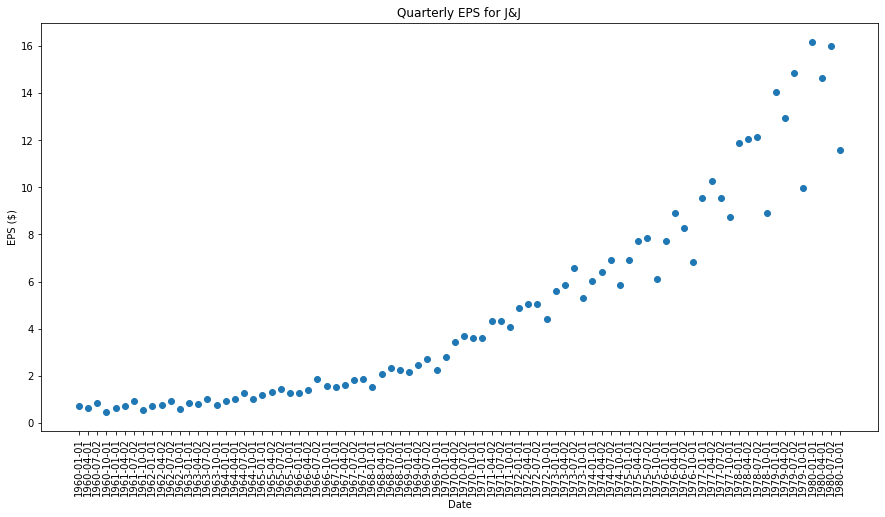

In [ ]:
plt.figure(figsize=[15, 7.5])
plt.scatter(data['date'], data['data'])
plt.title('Quarterly EPS for J&J')
plt.ylabel('EPS ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

Removing Trend Making Data Stationary

In [ ]:
# Take the log difference

data['data'] = np.log(data['data'])
data['data'] = data['data'].diff()
data = data.drop(data.index[0])

data.head()

,date,data
1,1960-04-01,-0.119545
2,1960-07-02,0.299517
3,1960-10-01,-0.658462
4,1961-01-01,0.326684
5,1961-04-02,0.123233


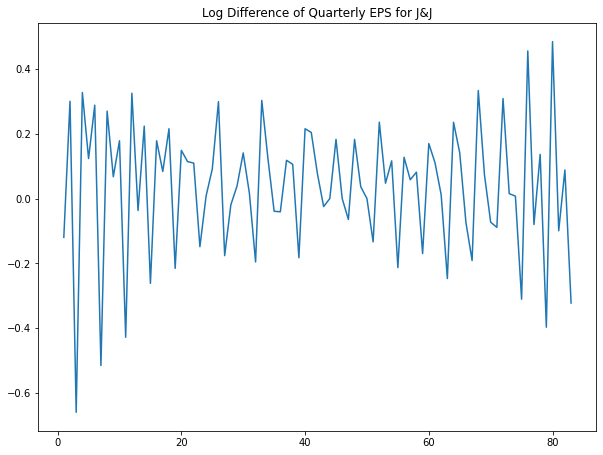

In [ ]:
plt.plot(data['data'])
plt.title('Log Difference of Quarterly EPS for J&J')
plt.show()

Verifying from P Value Data Is Stationary

In [ ]:
ad_fuller_result = adfuller(data['data'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.317043945811839
p-value: 0.000414973140444062


Data is Stationary so ACF will oscillate and hence PACF will convey that it is AR of Order 4

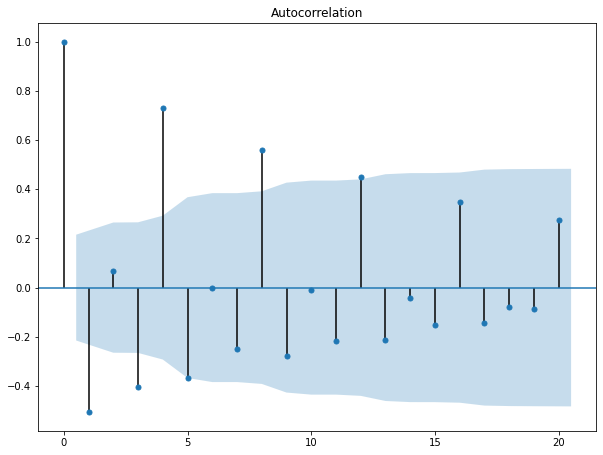

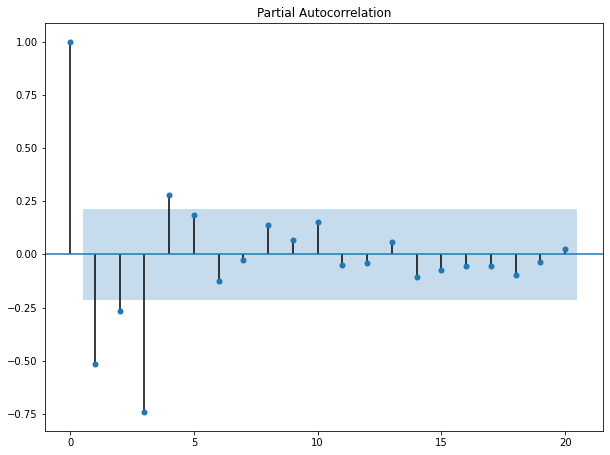

In [ ]:
plot_acf(data['data']);
plot_pacf(data['data']);

Modelling with AR(4)

In [ ]:
# Try AR(4)

rho, sigma = yule_walker(data['data'], 4)

print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [ 0.63642644  0.5364386   0.50578018 -0.27991345]
sigma: 0.11132979178317175
